In 2019, Many headlines were made saying that there was a decrease in percentage of students who took the SAT compared to the ACT, leading people to suggest to stop conducting the SAT altogether and to focus on the ACT. This resulted in the College Board forming a committee to check the same. This analysis seeks to explore if the headlines made were true, if so, what are those states and possible reasons behind that. This analysis also aims to make recommendations to the College Board for strategies to improve the participation rate

In [56]:
def mean_values(numbers):
    count=int(len(numbers))
    sum_numbers=sum(numbers)
    mean_numbers=sum_numbers/count
    return mean_numbers

In [57]:
mean_values([13, 18, 13, 14, 13, 16, 14, 21, 13])

15.0

In [58]:
def std_deviation(list_numbers):
    mean=mean_values(list_numbers)
    n=len(list_numbers)
    step2_list=[]
    for i in list_numbers:
        step_1=(i-mean)**2
        step2_list.append(step_1)
    step_3=sum(step2_list)/(n-1)
    final_stdeviation=(step_3)**(1/2)
    return final_stdeviation

In [59]:
std_deviation([3,4,5])

1.0

In [60]:
def percentage_to_float(num_percentage):
    replace_string=num_percentage.replace("%","").replace("—","0")
    final_result=float(replace_string)/100
    return  final_result

In [61]:
percentage_to_float("50%")

0.5

In [62]:
percentage_to_float("30.5%")

0.305

In [8]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read datasets:
sat_2019 = pd.read_csv("../data/sat_2019.csv")
act_2019 = pd.read_csv("../data/act_2019.csv")

In [10]:
display(sat_2019.head(5))
display(act_2019.head(5))

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [11]:
#checking for missing values
print(                 'SAT 2019')
display(sat_2019.isnull().sum())
print()
print(                 'ACT 2019')
display(act_2019.isnull().sum())

SAT 2019


State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64


ACT 2019


State            0
Participation    0
Composite        0
dtype: int64

In [12]:
#Getting value counts and sorting the index
print(                 'SAT 2019')
display(sat_2019[['Participation Rate']].value_counts().sort_index(ascending=False).head(5))
print()
print(                 'ACT 2019')
display(act_2019[['Participation']].value_counts().sort_index(ascending=False).head(5))

SAT 2019


Participation Rate
—                     2
99%                   2
95%                   1
94%                   1
9%                    1
dtype: int64


ACT 2019


Participation
96%              1
95%              1
82%              1
80%              1
78%              1
dtype: int64

In [13]:
#datatypes
display(sat_2019.dtypes)
act_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

State             object
Participation     object
Composite        float64
dtype: object

In [14]:
print('ACT 2019')
display(act_2019.describe())
print('SAT 2019')
sat_2019.describe()

ACT 2019


,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


SAT 2019


,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


In [15]:
#renaming columns
sat_2019.rename(columns= {'EBRW': 'english', 'Total': 'score', 'Math': 'math', 'State': 'state', 'Participation Rate': 'participation'}, inplace=True)
act_2019.rename(columns= {'Composite': 'score', 'State': 'state', 'Participation': 'participation'}, inplace=True)

In [16]:
display(act_2019)
display(sat_2019)

,state,participation,score
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6
5,Colorado,27%,23.8
6,Connecticut,22%,25.5
7,Delaware,13%,24.1
8,District of Columbia,32%,23.5
9,Florida,54%,20.1


,state,participation,english,math,score
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [17]:
#Dropping unwanted rows, in this case it is 'National'[51]
act_2019.drop(act_2019.index[51],inplace=True)

In [18]:
act_2019.reset_index(drop=True,inplace=True)

In [19]:
act_2019

,state,participation,score
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6
5,Colorado,27%,23.8
6,Connecticut,22%,25.5
7,Delaware,13%,24.1
8,District of Columbia,32%,23.5
9,Florida,54%,20.1


In [20]:
#dropping 'Virgin Islands'[48]
sat_2019.drop(sat_2019.index[48],inplace=True)

In [21]:
sat_2019.reset_index(drop=True,inplace=True)

In [22]:
sat_2019

,state,participation,english,math,score
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [23]:
#dropping 'Puerto Rico' [40]
sat_2019.drop(sat_2019.index[40],inplace=True)

In [24]:
sat_2019.reset_index(drop=True,inplace=True)

In [25]:
sat_2019

,state,participation,english,math,score
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [26]:
sat_2019.shape

(51, 5)

In [27]:
act_2019.shape

(51, 3)

In [28]:
#Converting percentages to floats
act_2019['participation']=act_2019['participation'].map(percentage_to_float)
sat_2019['participation']=sat_2019['participation'].map(percentage_to_float)

In [29]:
display(sat_2019.dtypes)
display(act_2019.dtypes)

state             object
participation    float64
english            int64
math               int64
score              int64
dtype: object

state             object
participation    float64
score            float64
dtype: object

In [30]:
#adding columns pertaining to SAT score & ACT score conversion
#https://soflotutors.com/blog/act-to-sat-conversion-chart-for-2022/#:~:text=A%20score%20range%20of%201160-1360%20on%20the%20SAT,middle%2050%20percent%20range%3A%20SAT%3A%201200-1460%20ACT%3A%2027-32
sat_2019['score percentage']=sat_2019['score']/1600*100
sat_2019.head()

,state,participation,english,math,score,score percentage
0,Alabama,0.07,583,560,1143,71.4375
1,Alaska,0.41,556,541,1097,68.5625
2,Arizona,0.31,569,565,1134,70.8750
3,Arkansas,0.06,582,559,1141,71.3125
4,California,0.63,534,531,1065,66.5625


In [31]:
act_2019['score percentage']=act_2019['score']/36*100
act_2019.head()

,state,participation,score,score percentage
0,Alabama,1.00,18.9,52.500000
1,Alaska,0.38,20.1,55.833333
2,Arizona,0.73,19.0,52.777778
3,Arkansas,1.00,19.3,53.611111
4,California,0.23,22.6,62.777778


In [34]:
#merge data
sat_act=pd.merge(act_2019,sat_2019, how='right')

In [33]:
sat_act.head()

,state,participation,score,score percentage,english,math
0,Alabama,0.07,1143,71.4375,583,560
1,Alaska,0.41,1097,68.5625,556,541
2,Arizona,0.31,1134,70.8750,569,565
3,Arkansas,0.06,1141,71.3125,582,559
4,California,0.63,1065,66.5625,534,531


In [35]:
#checking datatypes after that warning on 475
sat_act.dtypes

state                object
participation       float64
score                 int64
score percentage    float64
english               int64
math                  int64
dtype: object

In [36]:
testing2019 = sat_act[sat_act.columns[1:21]]
testing2019
sd_2019={key:std_deviation(testing2019[key]) for key in testing2019.columns}
sd_2019

{'participation': 0.39083289644191477,
 'score': 101.74583095953886,
 'score percentage': 6.359114434971179,
 'english': 47.84276534731694,
 'math': 54.25397789698981}

In [37]:
#Checking the states with the highest SAT participation percentage
sat_2019.sort_values('participation',ascending=False)[['state','participation']].head(15)

,state,participation
12,Idaho,1.00
9,Florida,1.00
22,Michigan,1.00
13,Illinois,1.00
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
48,West Virginia,0.99
19,Maine,0.99
29,New Hampshire,0.95


In [38]:
#Checking the states with the lowest SAT participation percentage
sat_2019.sort_values('participation')[['state','participation']].head(15)

,state,participation
46,Virgin Islands,0.00
39,Puerto Rico,0.00
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04


As you can see, Idaho, Florida, Michigan, Illinois, Colorado, Connecticut, and Delaware have the highest participation rate for taking the SAT tests at 100%. North Dakota is the state with the lowest (2%), Wyoming, South Dakota, Nebraska are listed in the lowest participation percentile.

In [39]:
#Checking the states with the highest ACT participation percentage
act_2019.sort_values('participation',ascending=False)[['state','participation']].head(15)

,state,participation
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0
27,Nebraska,1.0


In [40]:
#Checking the states with the lowest ACT participation percentage
act_2019.sort_values('participation')[['state','participation']].head(15)

,state,participation
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17
22,Michigan,0.19
45,Vermont,0.20
46,Virginia,0.21
21,Massachusetts,0.21
32,New York,0.22


ACT seems to have a higher minimum participation rate across the country. Maine is the lowest in 2019, at 6%, aside from that the second lowest is Rhode Island at 12%. Whereas in SAT there are 14 states with participation rate under 5%. There are 15 states with participation rate of 100% in ACT which shows that ACT is outpacing SAT.

In [41]:
#Lowest scores and participation
sat_act.sort_values('score')[['state','score','participation']].head(10)

,state,score,participation
46,Virgin Islands,935,0.00
48,West Virginia,943,0.99
39,Puerto Rico,944,0.00
36,Oklahoma,963,0.22
8,District of Columbia,975,0.94
7,Delaware,985,1.00
12,Idaho,993,1.00
9,Florida,999,1.00
22,Michigan,1003,1.00
19,Maine,1013,0.99


In [42]:
sat_act.sort_values('score',ascending=False)[['state','score','participation']].head(10)

,state,score,participation
23,Minnesota,1284,0.04
49,Wisconsin,1283,0.03
41,South Dakota,1268,0.03
34,North Dakota,1263,0.02
27,Nebraska,1260,0.03
15,Iowa,1244,0.03
16,Kansas,1241,0.04
50,Wyoming,1238,0.03
24,Mississippi,1237,0.03
25,Missouri,1236,0.04


States with high participation rate Delaware, Idaho are among the states with lowest score. States with low participation rate Wisconsin,North Dakota,South Dakota,Nebraska,Minnesota are the states with highest score. Exception is Oklahoma which has low participation rate and score

In [43]:
act_2019.sort_values('score percentage')[['state','score','participation']].head()

,state,score,participation
28,Nevada,17.9,1.00
24,Mississippi,18.4,1.00
40,South Carolina,18.8,0.78
18,Louisiana,18.8,1.00
0,Alabama,18.9,1.00


In [44]:
act_2019.sort_values('score percentage',ascending=False)[['state','score','participation']].head()

,state,score,participation
21,Massachusetts,25.5,0.21
6,Connecticut,25.5,0.22
29,New Hampshire,25.0,0.14
39,Rhode Island,24.7,0.12
32,New York,24.5,0.22


States with high mean ACT composite scores tend to be those with lower participation rates, and vice versa. For instance, Nevada with 100% participation rate tops as the state with lowest score

In [45]:
#states with more than 50% participation in both SAT and ACT

sat_act[(sat_act['participation'] > 0.5) 
              & (act_2019['participation'] > 0.5)][['state','participation']]

,state,participation
9,Florida,1.00
11,Hawaii,0.54
33,North Carolina,0.51
40,South Carolina,0.68


Of the four South: Carolina, North Carolina, Hawaii are in top 10 states with low ACT Score, whereas Florida, South Carolina are in top 15 least scored states and Hawaii, North Carolina were bit more than Mean Score

In [46]:
#states with more than 50% participation and achieved mean score of 1100 in SAT
sat_2019[(sat_2019['participation'] > 0.5) & (sat_2019['score'] > 1100)][['state','participation', 'score']]

,state,participation,score
21,Massachusetts,0.81,1120
37,Oregon,0.51,1112
45,Vermont,0.66,1106


In [47]:
#states with more than 50% participation and achieved mean score of 21 in ACT

act_2019[(act_2019['participation'] > 0.5) & (act_2019['score'] > 21)][['state','participation','score']]

,state,participation,score
15,Iowa,0.66,21.6
16,Kansas,0.72,21.2
23,Minnesota,0.95,21.4
41,South Dakota,0.75,21.6


These states have high participation rates and high scores for their respective tests and these are better achieving states

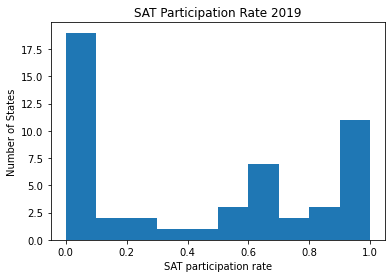

In [48]:
# Codeplt.figure(figsize=(8,5))
plt.hist(sat_2019[['participation']]);
plt.title('SAT Participation Rate 2019')
plt.xlabel('SAT participation rate');
plt.ylabel('Number of States');

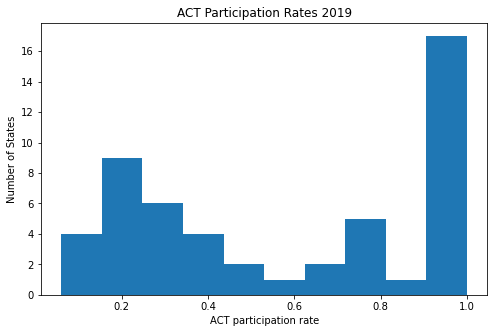

In [49]:
plt.figure(figsize=(8,5))
plt.hist(act_2019[['participation']])
plt.title('ACT Participation Rates 2019')
plt.xlabel('ACT participation rate');
plt.ylabel('Number of States');

SAT has a large group of low-end participation rates-less than 10%, a cluster of states with participation in the 50-75% range, and then a group of states with 100% participation. Whereas ACT has almost no states with lower than 10% participation, has a cluster of states in the 15-35% range, only a small number of states in the mid to high range, and then a large group of states with 100% participation.

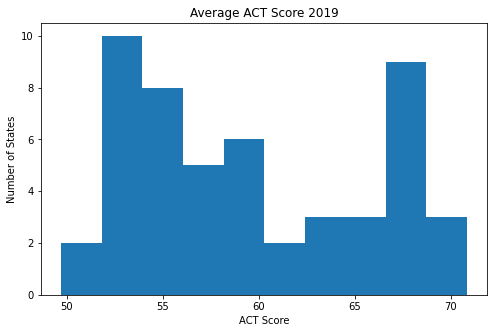

In [55]:

plt.figure(figsize=(8,5))
plt.hist(act_2019[['score percentage']])
plt.title('Average ACT Score 2019')
plt.xlabel('ACT Score');
plt.ylabel('Number of States');

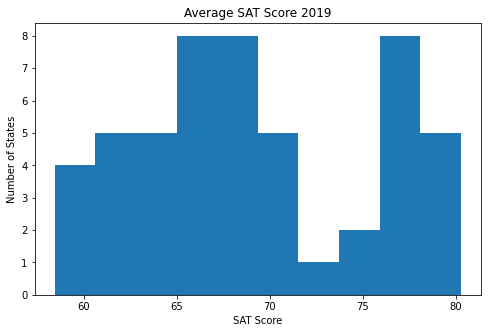

In [50]:
plt.figure(figsize=(8,5))
plt.hist(sat_2019[['score percentage']])
plt.title('Average SAT Score 2019')
plt.xlabel('SAT Score');
plt.ylabel('Number of States');

In both tests there is a cluster of high-participation state scores and a cluster of low-participation state scores

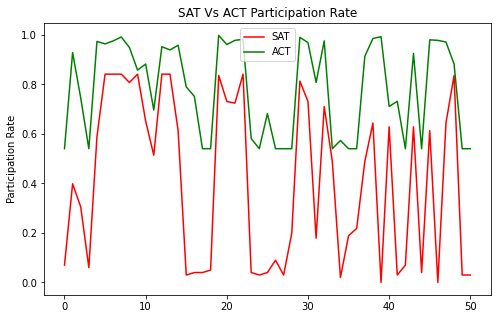

In [51]:
#https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
# Assign variables to the y axis part of the curve
y = np.sin(sat_2019['participation'])
z = np.cos(act_2019['participation'])
  
plt.figure(figsize=(8,5))
# Plotting both the curves simultaneously
plt.plot( y, color='r', label='SAT')
plt.plot( z, color='g', label='ACT')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("")
plt.ylabel("Participation Rate")
plt.title("SAT Vs ACT Participation Rate")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.show()

ACT participation rate is significantly higher than that of the SAT

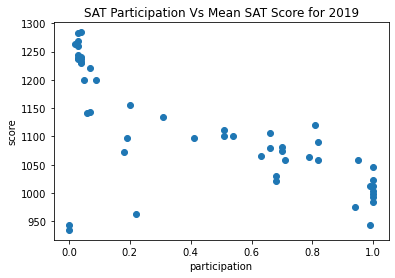

In [53]:
plt.scatter(x=sat_2019['participation'],y=sat_2019['score'])
plt.title('SAT Participation Vs Mean SAT Score for 2019')
plt.xlabel('participation');
plt.ylabel('score');

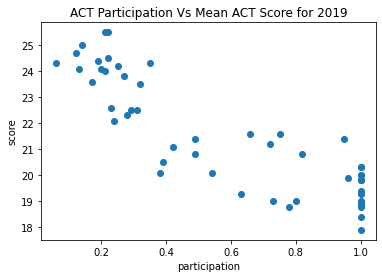

In [54]:
plt.scatter(x=act_2019['participation'],y=act_2019['score'])
plt.title('ACT Participation Vs Mean ACT Score for 2019')
plt.xlabel('participation');
plt.ylabel('score');

For both tests, lower rates of participation correspond with higher mean score by state. In the SAT plot, for instance, cluster of ACT-dominated states at top left where SAT participation is very low, and mean scores are all less than 1200. The small subset of high achieving students that bother to take both tests are high scorers, and so these states have artificially higher score averages. The downward slope of both graphs indicates the negative association between the variables.

There are 8 states with SAT Participation rate of 100% whereas there are 15 states with ACT participation rate of 100%.Lowest participation rate of SAT is 2% where as in ACT lowest participation rate is 6%. ACT outperfromed SAT in terms of participation rate in the year 2019. Participation is high in the states where test is made mandate by the state department and by waiving of the test fee. 11 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia and the District of Columbia) made SAT mandatory and administered at no cost to students because of which participation is above 90% in those states.

Because Illinois and Michigan state departments made SAT mandatory ACT participation is low there even though midwest region tends to prefer ACT. ACT and SAT participation rates are inversely proportional to their respective scores.Wisconsin,for instance,despite 3% participation,ranks 2nd in SAT mean score. In the same way,Rhode Island,despite 14% participation ranks 4th in ACT mean score.

In order to increase the participation of SAT, the College Board should collaborate with state departments of education to subsidize full costs of the test ,offer scholarships to students who take SAT and making SAT madnatory in the states with low participation. College board collaborating with coaching centers to offer free online pratcice tests and instructional videos on how to score more to students which will help in increasing states mean score as well. ACT is a paper based and computer based test whereas SAT is a paper based test. So college board should make computer-based SAT tests available so that it would be flexible for students and they can receive their scores faster.